In [2]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from sklearn import svm
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('amazon_review_data.pd')
df = df.sample(frac=1)
# Convert rating from double to int
df['rating'] = df['rating'].astype(int)

In [4]:
rating_1_df = df.loc[df['rating'] == 1]
rating_2_df = df.loc[df['rating'] == 2]
rating_3_df = df.loc[df['rating'] == 3]
rating_4_df = df.loc[df['rating'] == 4]
rating_5_df = df.loc[df['rating'] == 5]

In [5]:
rating_negative_df = rating_3_df
rating_negative_df = rating_negative_df.append(rating_2_df)
rating_negative_df = rating_negative_df.append(rating_1_df)

rating_positive_df = rating_5_df
rating_positive_df = rating_positive_df.append(rating_4_df)

rating_negative_df['rating'] = 0
rating_positive_df['rating'] = 1

In [6]:
numValues = min(len(rating_positive_df),len(rating_negative_df))
df.drop(df.index, inplace=True)
df = df.append(rating_positive_df[:numValues])
df = df.append(rating_negative_df[:numValues])
df = df.sample(frac=1)

In [7]:
subset_split = 10000
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
processed_reviews = vectorizer.fit_transform(df['reviews'][:subset_split])

In [15]:
def evaluation_metric(clf,test_X,test_y):
    prediction = clf.predict(test_X)
    # print('Accuarcy: {}'.format(accuracy_score(test_y,prediction)))
    print('Classification Report: ')
    print(classification_report(test_y,prediction))
    titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, test_X, test_y,
                                    display_labels=np.arange(0,2),
                                    cmap=plt.cm.Blues,
                                    normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()

In [9]:
train_X,test_X,train_y,test_y = train_test_split(processed_reviews, df['rating'][:subset_split], test_size=0.20, random_state=42)

---------------------------RBF SVM-----------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       990
           1       0.81      0.75      0.78      1010

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



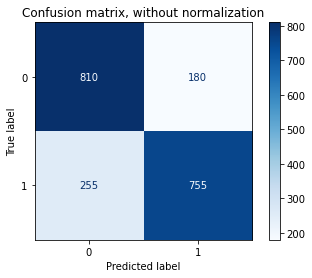

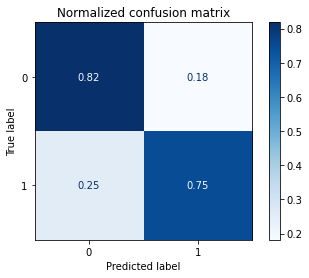

In [23]:
clf1 = svm.SVC(kernel='rbf').fit(train_X, train_y)
print('---------------------------RBF SVM-----------------------------')
evaluation_metric(clf1,test_X,test_y)

---------------------------Linear SVM---------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       990
           1       0.81      0.75      0.78      1010

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



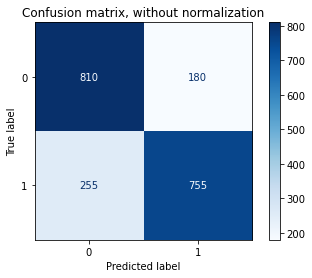

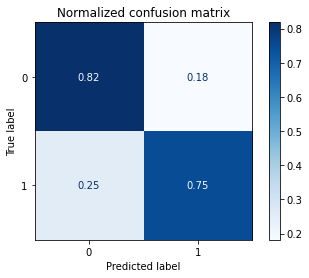

In [22]:
clf2 = svm.SVC(kernel='linear').fit(train_X, train_y)
print('---------------------------Linear SVM---------------------------')
evaluation_metric(clf1,test_X,test_y)

---------------------------Logitic Regression---------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       990
           1       0.81      0.75      0.78      1010

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



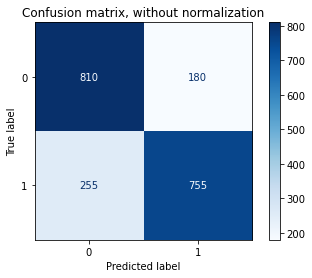

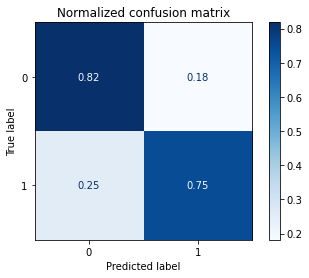

In [21]:
clf3 = LogisticRegression().fit(train_X, train_y)
print('---------------------------Logitic Regression---------------------------')
evaluation_metric(clf1,test_X,test_y)